In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('asteroid_data.csv')

In [3]:
df.head()

,name,approach_date,diameter_km,velocity_kmph,distance_km,is_hazardous
0,478784 (2012 UV136),2025-06-02,0.045,49511.25,50442662.03,False
1,(2015 RQ35),2025-06-02,0.082,11950.19,70450034.10,False
2,(2016 EL27),2025-06-02,0.036,25733.18,54278219.47,False
3,(2019 VF1),2025-06-02,0.149,80619.27,23118633.90,False
4,(2020 XS5),2025-06-02,0.027,40999.06,36304847.90,False


Define a label:

If distance < 1 million km and size > 140m → "High Risk"

Else if either condition met → "Medium Risk"

Else → "Low Risk"

👉 This creates a supervised dataset for ML.

In [4]:
max(df['diameter_km'])

3.855

In [5]:
conditions = [
    (df['distance_km'] < 1000000) & (df['diameter_km'] > 1.40),
    (df['distance_km'] < 1000000) | (df['diameter_km'] > 1.40)
]

# Define the choices
choices = ['High Risk', 'Medium Risk']

# Create the 'risk' column
df['risk'] = np.select(conditions, choices, default='Low Risk')


In [6]:
df

,name,approach_date,diameter_km,velocity_kmph,distance_km,is_hazardous,risk
0,478784 (2012 UV136),2025-06-02,0.045,49511.25,50442662.03,False,Low Risk
1,(2015 RQ35),2025-06-02,0.082,11950.19,70450034.10,False,Low Risk
2,(2016 EL27),2025-06-02,0.036,25733.18,54278219.47,False,Low Risk
3,(2019 VF1),2025-06-02,0.149,80619.27,23118633.90,False,Low Risk
4,(2020 XS5),2025-06-02,0.027,40999.06,36304847.90,False,Low Risk
...,...,...,...,...,...,...,...
1590,(2024 FA),2025-03-09,0.187,86494.30,27568592.00,False,Low Risk
1591,(2025 DE4),2025-03-09,0.063,48490.37,7719477.82,False,Low Risk
1592,(2025 DX4),2025-03-09,0.042,8333.79,14738665.39,False,Low Risk
1593,(2025 DZ6),2025-03-09,0.059,35613.66,4999225.93,False,Low Risk


In [7]:
# Define the mapping
risk_mapping = {
    'Low Risk': 0,
    'Medium Risk': 1,
    'High Risk': 2
}

# Apply the mapping
df['risk_numeric'] = df['risk'].map(risk_mapping)

In [8]:
df

,name,approach_date,diameter_km,velocity_kmph,distance_km,is_hazardous,risk,risk_numeric
0,478784 (2012 UV136),2025-06-02,0.045,49511.25,50442662.03,False,Low Risk,0
1,(2015 RQ35),2025-06-02,0.082,11950.19,70450034.10,False,Low Risk,0
2,(2016 EL27),2025-06-02,0.036,25733.18,54278219.47,False,Low Risk,0
3,(2019 VF1),2025-06-02,0.149,80619.27,23118633.90,False,Low Risk,0
4,(2020 XS5),2025-06-02,0.027,40999.06,36304847.90,False,Low Risk,0
...,...,...,...,...,...,...,...,...
1590,(2024 FA),2025-03-09,0.187,86494.30,27568592.00,False,Low Risk,0
1591,(2025 DE4),2025-03-09,0.063,48490.37,7719477.82,False,Low Risk,0
1592,(2025 DX4),2025-03-09,0.042,8333.79,14738665.39,False,Low Risk,0
1593,(2025 DZ6),2025-03-09,0.059,35613.66,4999225.93,False,Low Risk,0


# EDA

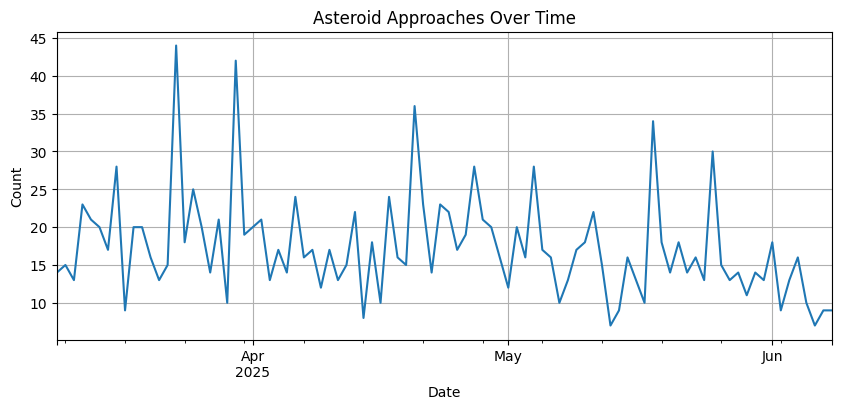

In [9]:
df['approach_date'] = pd.to_datetime(df['approach_date'])
daily_counts = df.groupby('approach_date').size()

import matplotlib.pyplot as plt
daily_counts.plot(title='Asteroid Approaches Over Time', figsize=(10, 4))
plt.xlabel("Date")
plt.ylabel("Count")
plt.grid(True)
plt.show()


Date is meangingless in the scale of time in space

In [10]:
# prompt: replace 'False' with 0 and 'True' with 1 in is_hazardous

df['is_hazardous'] = df['is_hazardous'].replace({False: 0, True: 1})
df.head()

<ipython-input-10-38b121644275>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['is_hazardous'] = df['is_hazardous'].replace({False: 0, True: 1})


,name,approach_date,diameter_km,velocity_kmph,distance_km,is_hazardous,risk,risk_numeric
0,478784 (2012 UV136),2025-06-02,0.045,49511.25,50442662.03,0,Low Risk,0
1,(2015 RQ35),2025-06-02,0.082,11950.19,70450034.10,0,Low Risk,0
2,(2016 EL27),2025-06-02,0.036,25733.18,54278219.47,0,Low Risk,0
3,(2019 VF1),2025-06-02,0.149,80619.27,23118633.90,0,Low Risk,0
4,(2020 XS5),2025-06-02,0.027,40999.06,36304847.90,0,Low Risk,0


In [11]:
# prompt: Using dataframe df: Drop the column risk and rename risk_numeric to risk

# Drop the column 'risk'
df = df.drop('risk', axis=1)

# Rename the column 'risk_numeric' to 'risk'
df = df.rename(columns={'risk_numeric': 'risk'})

In [15]:
new_df = df[['diameter_km', 'velocity_kmph', 'distance_km','is_hazardous','risk']]

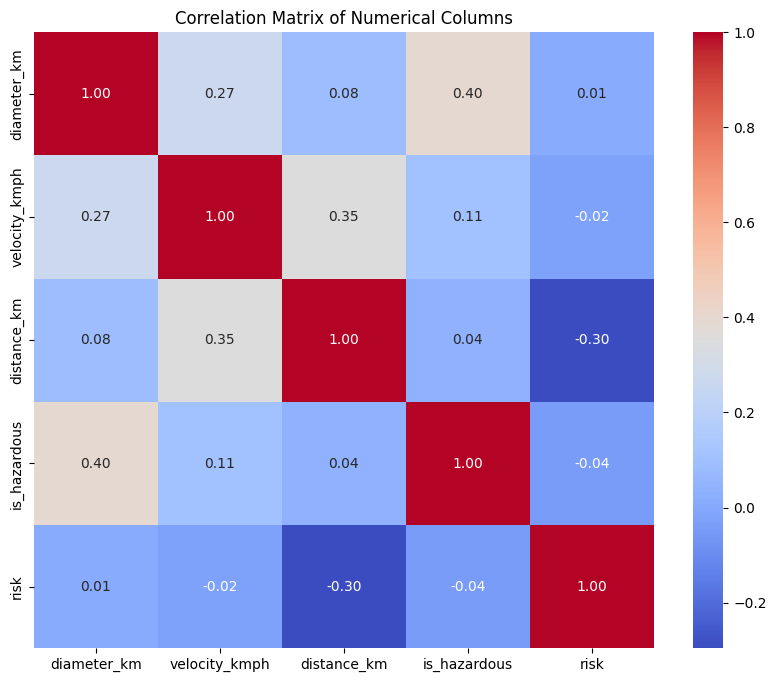

In [16]:
# prompt: Create correlation matrix for all columns with seaborn

import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = new_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()


Seems that distance_km has the highest correlation

#### 1. **`diameter_km` vs `is_hazardous` → 0.40**

* **Moderate positive correlation**
* 🚀 Bigger asteroids are *more likely* to be classified as hazardous.
* This makes sense scientifically — larger objects cause more damage if they hit.

---

#### 2. **`velocity_kmph` vs `distance_km` → 0.35**

* Slight positive correlation
* 🛰️ Faster asteroids tend to pass at a slightly greater distance. Possibly a detection bias or physical trend, but weak.

---

#### 3. **`distance_km` vs `risk` → -0.30**

* ❗ Weak-to-moderate **negative** correlation
* As expected: **closer asteroids = higher risk**

---

#### 4. **`diameter_km`, `velocity_kmph`, and `distance_km` vs `risk` → all \~0 to -0.30**

* Low correlations, but `distance_km` has the strongest impact on `risk`
* Suggests that `risk` may be more dependent on a **combination** of features rather than any one factor

---

#### 5. **`is_hazardous` vs `risk` → -0.04**

* Basically no correlation



Not much information available to clarify the logic for using is_hazardous

In [17]:
new_df

,diameter_km,velocity_kmph,distance_km,is_hazardous,risk
0,0.045,49511.25,50442662.03,0,0
1,0.082,11950.19,70450034.10,0,0
2,0.036,25733.18,54278219.47,0,0
3,0.149,80619.27,23118633.90,0,0
4,0.027,40999.06,36304847.90,0,0
...,...,...,...,...,...
1590,0.187,86494.30,27568592.00,0,0
1591,0.063,48490.37,7719477.82,0,0
1592,0.042,8333.79,14738665.39,0,0
1593,0.059,35613.66,4999225.93,0,0


In [20]:
# prompt: Replace risk with a new parameter risk_score. risk_score is the product of diameter and square of velocity, divided by the distance_km

new_df['risk_score'] = (new_df['diameter_km'] * (new_df['velocity_kmph']**2)) / new_df['distance_km']
new_df = new_df.drop('risk', axis=1)
# df = df.drop('risk_numeric', axis=1)
new_df.head()

<ipython-input-20-85f0c25a3582>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['risk_score'] = (new_df['diameter_km'] * (new_df['velocity_kmph']**2)) / new_df['distance_km']


,diameter_km,velocity_kmph,distance_km,is_hazardous,risk_score
0,0.045,49511.25,50442662.03,0,2.186867
1,0.082,11950.19,70450034.10,0,0.166220
2,0.036,25733.18,54278219.47,0,0.439202
3,0.149,80619.27,23118633.90,0,41.889177
4,0.027,40999.06,36304847.90,0,1.250106


In [21]:
# prompt: normalise risk_score

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
new_df['risk_score'] = scaler.fit_transform(new_df[['risk_score']])

new_df.head()

,diameter_km,velocity_kmph,distance_km,is_hazardous,risk_score
0,0.045,49511.25,50442662.03,0,0.000435
1,0.082,11950.19,70450034.10,0,0.000031
2,0.036,25733.18,54278219.47,0,0.000085
3,0.149,80619.27,23118633.90,0,0.008381
4,0.027,40999.06,36304847.90,0,0.000247


In [24]:
# prompt: Split data into a 80:20 split and then train a logistic regression model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = new_df.drop('is_hazardous', axis=1) # Features
y = new_df['is_hazardous'] # Target variable

# Split data into training and testing sets (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# You can now evaluate the model using X_test and y_test
# e.g., from sklearn.metrics import accuracy_score
# y_pred = model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Model Accuracy: {accuracy}")

LogisticRegression()

In [27]:
# You can now evaluate the model using X_test and y_test
# e.g.,
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.9686520376175548


In [28]:
# prompt: Generate classifier report for the model

from sklearn.metrics import classification_report

# Generate classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98       309
           1       0.00      0.00      0.00        10

    accuracy                           0.97       319
   macro avg       0.48      0.50      0.49       319
weighted avg       0.94      0.97      0.95       319



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
